In [ ]:
import io
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [ ]:
uploaded = files.upload()

Saving New data.xlsx to New data (1).xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded.get('New data.xlsx')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee                   596 non-null    object
 1   Job Title                  596 non-null    object
 2   Job Grade                  596 non-null    int64 
 3   Gender Reduced             596 non-null    int64 
 4   Gender                     596 non-null    object
 5   Full/Part Time Reduced     596 non-null    int64 
 6   Full/Part Time             596 non-null    object
 7   Total Compensation         596 non-null    int64 
 8   Years of Experience        596 non-null    int64 
 9   Performance Score Reduced  596 non-null    int64 
 10  Performance Rating         596 non-null    object
 11  Location                   596 non-null    object
 12  Special Qualifications     596 non-null    object
 13  % of Time Traveling        596 non-null    int64 
 14  Shifts    

In [ ]:
df = df[['Job Grade', 'Gender Reduced', 'Full/Part Time Reduced', 'Total Compensation', 'Years of Experience',	'Performance Score Reduced', 'Location',	'Special Qualifications',	'% of Time Traveling',	'Shifts']]
df

,Job Grade,Gender Reduced,Full/Part Time Reduced,Total Compensation,Years of Experience,Performance Score Reduced,Location,Special Qualifications,% of Time Traveling,Shifts
0,2,1,0,87397,14,5,Applicable,Not Applicable,0,Non Regular
1,1,0,1,96675,7,2,Not Applicable,Not Applicable,0,Regular
2,2,1,0,52914,11,4,Applicable,Applicable,0,Non Regular
3,2,1,0,71007,13,4,Applicable,Applicable,0,Non Regular
4,2,1,1,82228,12,4,Applicable,Applicable,0,Non Regular
...,...,...,...,...,...,...,...,...,...,...
591,2,1,0,65866,15,1,Applicable,Not Applicable,0,Regular
592,4,0,0,34900,3,4,Applicable,Applicable,0,Regular
593,1,0,0,92838,8,4,Not Applicable,Not Applicable,0,Regular
594,1,0,1,45300,15,2,Not Applicable,Not Applicable,0,Non Regular


In [ ]:
df['Location'] = df['Location'].map({"Applicable":1,"Not Applicable":0})

In [ ]:
df['Special Qualifications'] = df['Special Qualifications'].map({"Applicable":1,"Not Applicable":0}) 

In [ ]:
df['Shifts'] = df['Shifts'].map({"Non Regular":1,"Regular":0}) 

In [ ]:
df

,Job Grade,Gender Reduced,Full/Part Time Reduced,Total Compensation,Years of Experience,Performance Score Reduced,Location,Special Qualifications,% of Time Traveling,Shifts
0,2,1,0,87397,14,5,1,0,0,1
1,1,0,1,96675,7,2,0,0,0,0
2,2,1,0,52914,11,4,1,1,0,1
3,2,1,0,71007,13,4,1,1,0,1
4,2,1,1,82228,12,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
591,2,1,0,65866,15,1,1,0,0,0
592,4,0,0,34900,3,4,1,1,0,0
593,1,0,0,92838,8,4,0,0,0,0
594,1,0,1,45300,15,2,0,0,0,1


In [ ]:
correlation = df[['Job Grade', 'Gender Reduced', 'Full/Part Time Reduced', 'Total Compensation', 'Years of Experience',	'Performance Score Reduced', 'Location',	'Special Qualifications',	'% of Time Traveling',	'Shifts']].corr()

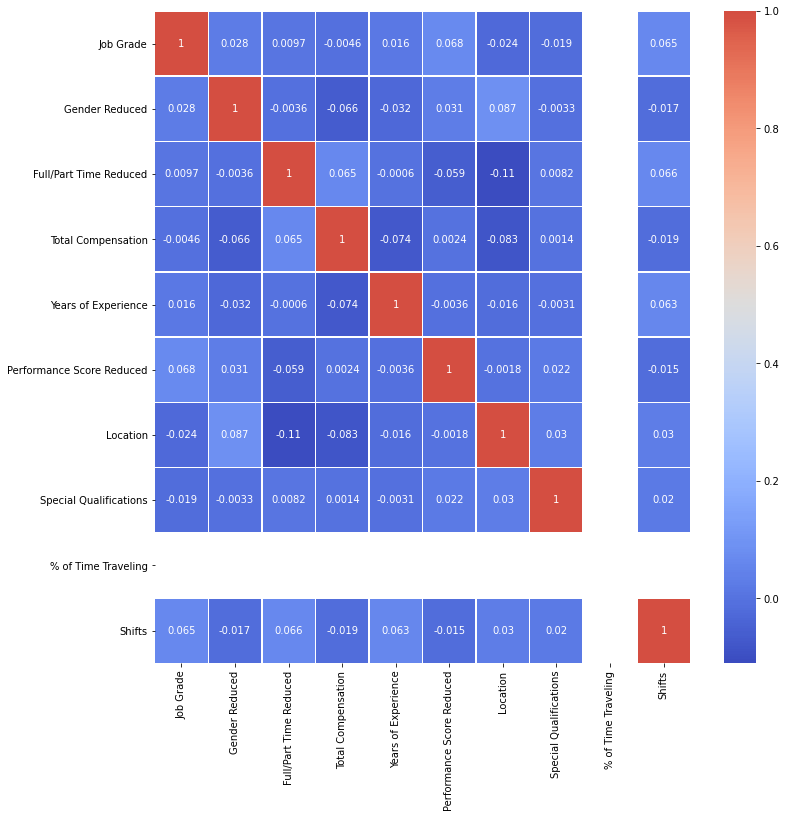

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation, annot=True, linewidths=.5, center= 0.5, cmap='coolwarm', ax=ax)

In [ ]:
X = df[['Job Grade', 'Gender Reduced', 'Full/Part Time Reduced', 'Years of Experience',	'Performance Score Reduced', 'Location',	'Special Qualifications',	'% of Time Traveling',	'Shifts']]
y = df['Total Compensation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Job Grade,Gender Reduced,Full/Part Time Reduced,Years of Experience,Performance Score Reduced,Location,Special Qualifications,% of Time Traveling,Shifts
595,1,0,0,6,1,1,0,0,0
564,2,1,0,12,3,0,1,0,0
432,3,0,1,13,2,0,1,0,0
228,4,0,0,6,2,1,0,0,0
421,4,0,1,9,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
71,1,0,1,7,1,0,0,0,0
106,3,0,0,4,3,0,0,0,1
270,1,0,1,3,3,0,0,0,1
435,2,1,0,4,1,1,1,0,0


In [ ]:
y_train

595    63625
564    51807
432    48954
228    41678
421    37423
       ...  
71     89044
106    37384
270    27076
435    52029
102    91444
Name: Total Compensation, Length: 417, dtype: int64

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = lr.predict(X_test)
y_predict

array([65094.95136162, 61395.80959888, 63355.90144813, 65268.81693367,
       67194.7088716 , 65674.11473516, 63996.44119668, 60908.34076568,
       62081.22981626, 65740.89991512, 61235.06089646, 67662.42259685,
       58199.65725978, 63812.30651195, 64781.35151147, 59336.63568604,
       59656.62290288, 60612.16810966, 64052.96067495, 66991.50584467,
       63914.2889076 , 68556.70919862, 63995.46604593, 62489.3888275 ,
       68123.21224848, 63100.52496725, 68087.90067379, 60754.11253158,
       60059.875951  , 61786.28686349, 59673.14733076, 58444.72265348,
       57641.27321131, 62169.90257366, 62757.24456489, 68646.28472226,
       67980.36506032, 59331.23056198, 62080.75221752, 59772.26510567,
       66936.10171065, 59467.64840895, 60286.93551325, 58496.73268205,
       67414.3219674 , 64961.76419471, 66936.10171065, 67407.04611597,
       58995.00011263, 64691.83509601, 60714.00312219, 61133.22588393,
       57730.73096496, 66546.52721229, 70150.77945444, 71650.59794669,
      

In [ ]:
rmse_error = MSE(np.array(y_test), y_predict, squared=False) ** (1/2)
print(rmse_error)

148.65562218333608


In [ ]:
vif = [variance_inflation_factor(X_train.values, i)  for i in range(len(X_train.columns))] 
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[5.222521955175909,
 1.9666913226644114,
 1.9923139637095222,
 4.020880450737447,
 4.564298127796768,
 1.8703750002112542,
 1.9369904241919262,
 nan,
 2.0152785703268568]

In [ ]:
clf = tree.DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=9, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=9, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(697.5, 1261.9285714285713, 'X[3] <= 7.5\nmse = 460287310.23\nsamples = 417\nvalue = 64257.803'),
 Text(232.5, 1067.7857142857142, 'X[1] <= 0.5\nmse = 458878189.778\nsamples = 184\nvalue = 66687.663'),
 Text(116.25, 873.6428571428571, 'mse = 416918616.359\nsamples = 94\nvalue = 70591.883'),
 Text(348.75, 873.6428571428571, 'X[4] <= 4.5\nmse = 470154265.916\nsamples = 90\nvalue = 62609.922'),
 Text(232.5, 679.5, 'mse = 472226116.433\nsamples = 70\nvalue = 60734.1'),
 Text(465.0, 679.5, 'X[3] <= 6.5\nmse = 407483122.21\nsamples = 20\nvalue = 69175.3'),
 Text(348.75, 485.3571428571429, 'mse = 363059239.463\nsamples = 19\nvalue = 70990.105'),
 Text(581.25, 485.3571428571429, 'mse = 0.0\nsamples = 1\nvalue = 34694.0'),
 Text(1162.5, 1067.7857142857142, 'X[0] <= 1.5\nmse = 453055513.108\nsamples = 233\nvalue = 62338.944'),
 Text(1046.25, 873.6428571428571, 'X[1] <= 0.5\nmse = 491491971.497\nsamples = 44\nvalue = 68652.659'),
 Text(930.0, 679.5, 'X[3] <= 13.5\nmse = 541829365.583\nsample

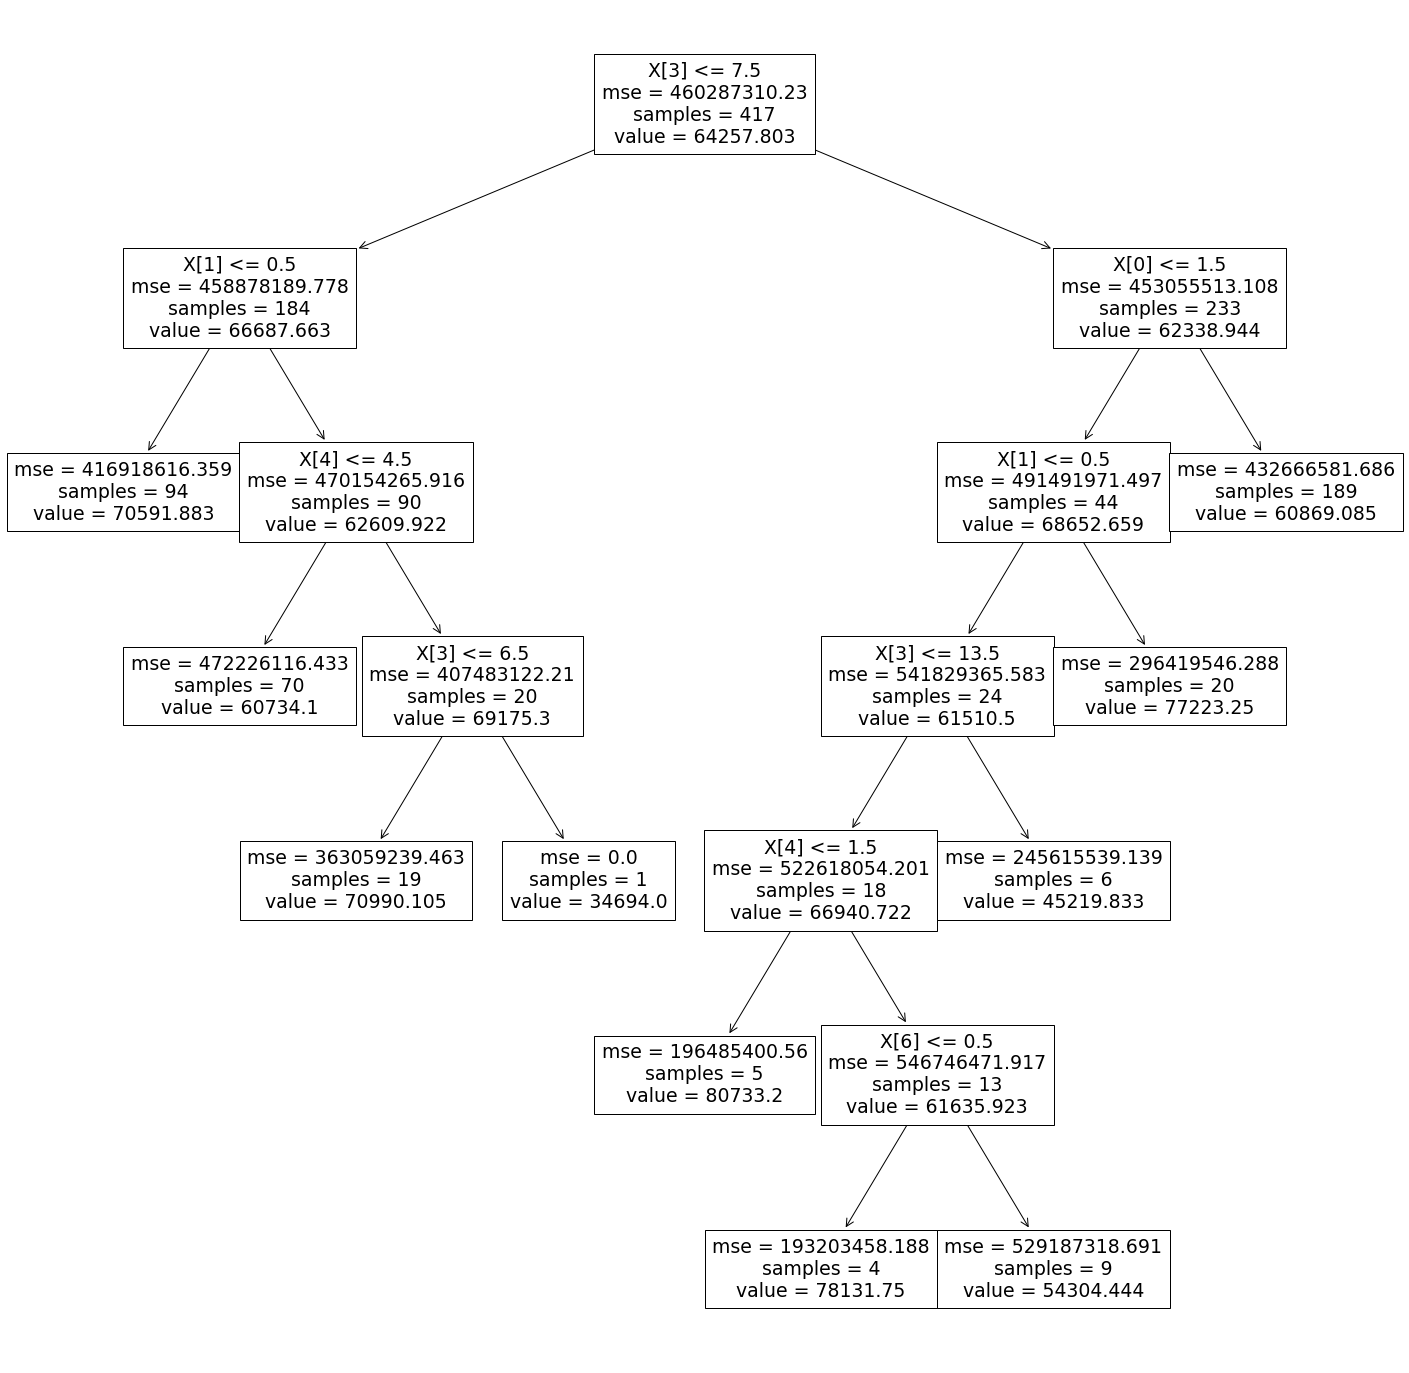

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
tree.plot_tree(clf, ax=ax)